In [3]:
import pickle

#triplets of path-nickname-label
exp_data  = [
    ('20180327_1102_K562_5EU_0_unlabeled_run','nanoid_neg_1', 0),
    ('20180514_1541_K562_5EU_1440_labeled_II_run','nanoid_pos_2', 1),
]

exp_to_preds = {}
exp_to_label = {}
for path, nickname, label in exp_data:
    #TODO remove relative path
    with open(f'./inference/{path}/reads.pickle','rb') as f:
        exp_to_preds[nickname] = pickle.load(f)
        exp_to_label[nickname] = label
        print(nickname, len(exp_to_preds[nickname]))



nanoid_neg_1 13787
nanoid_pos_2 15120


In [33]:
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np

def plot_roc(exp_to_preds, title=''):
    labels = []
    predictions = [] 
    exps = list(exp_to_preds.keys())
    for exp, preds in exp_to_preds.items():
        for pred in preds.values():
            predictions.append(pred)
            labels.append(exp_to_label[exp])
            
    if(np.isnan(predictions).any()):
        print('Warning: Nan found in predictions, setting to 0')
        print(np.where(np.isnan(predictions)))
        for nan_idx in np.where(np.isnan(predictions))[0]:
            predictions[nan_idx] = 0.0
    
    fpr, tpr, thresholds = metrics.roc_curve(labels, predictions)
    cutoff_1 = thresholds[np.argmax(tpr-fpr)]
    cutoff_1_tpr = tpr[np.argmax(tpr-fpr)]
    
    cutoff_2 = thresholds[np.argmin((1-tpr) ** 2 + fpr ** 2)]
    cutoff_2_tpr = tpr[np.argmin((1-tpr) ** 2 + fpr ** 2)]
    
    try:
        auc = metrics.roc_auc_score(labels, predictions)
        precision, recall, thresholds = metrics.precision_recall_curve(labels, predictions)
    except ValueError:
        print('AUC not defined')
        auc=0
    print(auc)
    exps = str(exps[:len(exps)//2])+'\n'+str(exps[len(exps)//2:]) #For nice legend printing
    plt.plot(fpr, tpr, label = f'{exps} \n AUC %.3f CUTOFFS {str(cutoff_1)[:4]} (tpr {str(cutoff_1_tpr)[:4]}) or {str(cutoff_2)[:4]} (tpr {str(cutoff_2_tpr)[:4]})' % auc)
    plt.title(f'{title}')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5), prop={'size':10})
    

    plt.xlim([0, 1.05])
    plt.ylim([0, 1.05])

0.8527132256519542


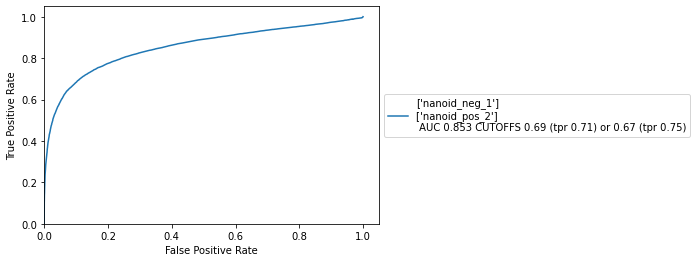

In [34]:
plot_roc(exp_to_preds)